In [20]:
# instalação dos pacotes
%pip install osmnx geopandas odfpy matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 2.5 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 2.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
# importação dos pacotes
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [3]:
# Definição do polígono do campus da Unifor
coordenadas: list[tuple[float]] = [
    (-38.481661, -3.771271),
    (-38.482034, -3.768190),
    (-38.480789, -3.768051),
    (-38.480912, -3.766418),
    (-38.477034, -3.766084),
    (-38.476956, -3.766911),
    (-38.476444, -3.766839),
    (-38.475435, -3.766550),
    (-38.473797, -3.766980),
    (-38.473748, -3.768062),
    (-38.473145, -3.768340),
    (-38.474609, -3.770682),
    (-38.481661, -3.771271)  # fecha polígono
]

poligono_campus: Polygon = Polygon(coordenadas)

In [4]:
# Rede de pedestres do campus
# inclui calçadas, trilhas e serviços internos
G = ox.graph_from_polygon(poligono_campus, network_type='walk')

# converter para GeoDataFrames
vertices, arestas = ox.graph_to_gdfs(G)

print("Nós:", vertices.shape)
print("Arestas:", arestas.shape)

Nós: (220, 4)
Arestas: (642, 8)


In [5]:
vertices.head()

,y,x,street_count,geometry
osmid,,,,
2509034642,-3.767312,-38.478658,3,POINT (-38.47866 -3.76731)
2509034645,-3.766542,-38.480546,3,POINT (-38.48055 -3.76654)
2509044571,-3.766447,-38.480553,3,POINT (-38.48055 -3.76645)
2881997392,-3.769810,-38.481829,3,POINT (-38.48183 -3.76981)
2881997394,-3.769227,-38.481588,1,POINT (-38.48159 -3.76923)


In [6]:
arestas.head()

osmid  highway        service  oneway reversed  \
u          v          key                                                       
2509034642 5262889773 0    544433039  service  parking_aisle   False     True   
           7772552596 0    544433028  service            NaN   False    False   
           5262889772 0    544433028  service            NaN   False     True   
2509034645 2509044571 0    544433060  service            NaN   False    False   
           5262889823 0    544433060  service            NaN   False     True   

                              length  \
u          v          key              
2509034642 5262889773 0    55.148469   
           7772552596 0     9.324351   
           5262889772 0    18.765622   
2509034645 2509044571 0    10.661063   
           5262889823 0    16.827500   

                                                                    geometry  \
u          v          key                                                      
2509034642 5262889773 0    LINESTRING (-38.47866 -3.76731, -38.47816 -3.7...   
           7772552596 0    LINESTRING (-38.47866 -3.76731, -38.47866 -3.7...   
           5262889772 0    LINESTRING (-38.47866 -3.76731, -38.47865 -3.7...   
2509034645 2509044571 0    LINESTRING (-38.48055 -3.76654, -38.48055 -3.7...   
           5262889823 0    LINESTRING (-38.48055 -3.76654, -38.4807 -3.76...   

                          junction  
u          v          key           
2509034642 5262889773 0        NaN  
           7772552596 0        NaN  
           5262889772 0        NaN  
2509034645 2509044571 0        NaN  
           5262889823 0        NaN

In [ ]:
arestas.columns

Index(['osmid', 'highway', 'service', 'oneway', 'reversed', 'length',
       'geometry', 'junction'],
      dtype='object')

In [17]:
vertices.columns

Index(['y', 'x', 'street_count', 'geometry'], dtype='object')

In [8]:
# Pontos de interesse e atributos de acessibilidade
tags = {
    "amenity": True, 
    "building": True,
    "entrance": True,
    "highway": ["footway", "path", "service", "steps", "elevator"],
    "wheelchair": True,
    "elevator": True,
    "incline": True,
    "kerb": True,
    "surface": True,
    "smoothness": True,
    "width": True,
}

pontos_de_interesse = ox.features_from_polygon(poligono_campus, tags)

print("Pontos de Interesse:", pontos_de_interesse.shape)

Pontos de Interesse: (329, 53)


In [9]:
pontos_de_interesse.head()

geometry          amenity  \
element id                                                        
node    2509034620  POINT (-38.48022 -3.76753)          theatre   
        4270037929   POINT (-38.4811 -3.76867)  bicycle_parking   
        4270037930  POINT (-38.48152 -3.76951)  bicycle_parking   
        5682978770  POINT (-38.47963 -3.76909)        fast_food   
        6238824729  POINT (-38.47911 -3.76894)             bank   

                                     name      access bicycle_parking  \
element id                                                              
node    2509034620  Teatro Celina Queiroz         NaN             NaN   
        4270037929                    NaN  permissive          stands   
        4270037930                    NaN  permissive          stands   
        5682978770                  Bob's         NaN             NaN   
        6238824729               Bradesco         NaN             NaN   

                   capacity covered     brand brand:wikidata cuisine  ...  \
element id                                                            ...   
node    2509034620      NaN     NaN       NaN            NaN     NaN  ...   
        4270037929       12      no       NaN            NaN     NaN  ...   
        4270037930       12      no       NaN            NaN     NaN  ...   
        5682978770      NaN     NaN     Bob's       Q1392113  burger  ...   
        6238824729      NaN     NaN  Bradesco        Q806181     NaN  ...   

                   junction natural ramp:wheelchair bridge athletics type  \
element id                                                                  
node    2509034620      NaN     NaN             NaN    NaN       NaN  NaN   
        4270037929      NaN     NaN             NaN    NaN       NaN  NaN   
        4270037930      NaN     NaN             NaN    NaN       NaN  NaN   
        5682978770      NaN     NaN             NaN    NaN       NaN  NaN   
        6238824729      NaN     NaN             NaN    NaN       NaN  NaN   

                   addr:housenumber addr:street addr:suburb short_name  
element id                                                              
node    2509034620              NaN         NaN         NaN        NaN  
        4270037929              NaN         NaN         NaN        NaN  
        4270037930              NaN         NaN         NaN        NaN  
        5682978770              NaN         NaN         NaN        NaN  
        6238824729              NaN         NaN         NaN        NaN  

[5 rows x 53 columns]

In [18]:
pontos_de_interesse.columns

Index(['geometry', 'amenity', 'name', 'access', 'bicycle_parking', 'capacity',
       'covered', 'brand', 'brand:wikidata', 'cuisine', 'takeaway',
       'brand:wikipedia', 'dispensing', 'healthcare', 'leisure', 'sport',
       'surface', 'addr:city', 'addr:housename', 'building', 'building:levels',
       'email', 'height', 'internet_access', 'internet_access:fee',
       'opening_hours', 'operator', 'operator:type', 'phone',
       'pmfsefin:idedif', 'website', 'internet_access:ssid', 'outdoor_seating',
       'smoking', 'wheelchair', 'shop', 'layer', 'lit', 'highway', 'oneway',
       'landuse', 'religion', 'service', 'junction', 'natural',
       'ramp:wheelchair', 'bridge', 'athletics', 'type', 'addr:housenumber',
       'addr:street', 'addr:suburb', 'short_name'],
      dtype='object')

In [12]:
pontos_de_interesse.to_excel("dados_campus_unifor.ods", engine="odf", index=False)

In [19]:
pontos_de_interesse['wheelchair'].value_counts()

wheelchair
yes    14
Name: count, dtype: int64

/tmp/ipykernel_5971/3997829326.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


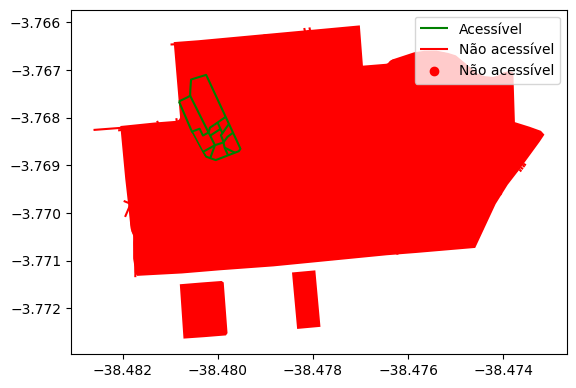

In [ ]:
fig, ax = plt.subplots()

# Pontos acessíveis em verde
pontos_de_interesse[pontos_de_interesse['wheelchair'] == 'yes'].plot(ax=ax, color='green', label='Acessível')

# Demais pontos em vermelho
pontos_de_interesse[pontos_de_interesse['wheelchair'] != 'yes'].plot(ax=ax, color='red', label='Não acessível')

plt.legend()
plt.show()